In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
def plot_history(history, nEpoch):
    # Plot loss and accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(nEpoch)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.tight_layout()
    plt.show()

In [ ]:
#đọc data
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/AML/main/lab-04/spam_detection.csv")
df.head()


,Text,Label,y
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


In [ ]:
nltk.download('punkt')
texts = df["Text"].to_list()
texts = [text.lower() for text in texts ]           # chuyển các đoạn text thành chữ thường (word embedding chỉ cho chữ thường)
tokenized_texts = [nltk.tokenize.word_tokenize(text) for text in texts]    # tách câu thành một list các từ

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(tokenized_texts[0])


['go', 'until', 'jurong', 'point', ',', 'crazy..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']


In [ ]:
#Tải bộ weights Glove
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-11-17 13:03:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-11-17 13:03:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-11-17 13:03:52--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#Giải Nén
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import io
import numpy as np
def load_word_embeddings(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    vocab, matrix = [], []
    i=0
    for line in fin:
        tokens = line.rstrip().split(' ')
        vocab.append(tokens[0])
        matrix.append(list(map(float, tokens[1:])))
    return vocab, np.asarray(matrix)

In [ ]:
vocab, matrix = load_word_embeddings("glove.6B.100d.txt")

In [ ]:
matrix.shape

(400000, 100)

In [ ]:


## Gán các mã
__PADDED_INDEX__ = 0    # mã dùng cho các vị trí chỉ có tính nối dài cho cùng kích thước
__UNKNOWN_WORD__ = 1    # mã cho những từ không có trong embedding



In [ ]:
word_to_index = {word: index+2 for index, word in enumerate(vocab)}


In [ ]:
embedding_matrix = np.pad(matrix, ((2,0),(0,0)), mode='constant', constant_values =0.0)
print(embedding_matrix)

[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.038194 -0.24487   0.72812  ... -0.1459    0.8278    0.27062 ]
 ...
 [ 0.36088  -0.16919  -0.32704  ...  0.27139  -0.29188   0.16109 ]
 [-0.10461  -0.5047   -0.49331  ...  0.42527  -0.5125   -0.17054 ]
 [ 0.28365  -0.6263   -0.44351  ...  0.43678  -0.82607  -0.15701 ]]


In [ ]:
import tensorflow as tf

X = []
for text in tokenized_texts:
    cur_text_indices = []
    for word in text:
        if word in word_to_index:
            cur_text_indices.append(word_to_index[word])    
        else:
            cur_text_indices.append(__UNKNOWN_WORD__)       
    X.append(cur_text_indices)

## pad data cho có cùng chiều dài
X = tf.keras.preprocessing.sequence.pad_sequences(sequences=X,       
                                                  padding='post')    

y = df['y'].values   ## Label của bài toán, 0 là không phải spam, 1 là spam


In [ ]:
## Chia data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state =0)

In [ ]:
X_train.shape

(4459, 215)

In [ ]:
embedding_matrix.shape

(400002, 100)

**LSTM không có Pooling**

In [ ]:


from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(None,))                   

embed = Embedding(input_dim=embedding_matrix.shape[0],   
                 output_dim=embedding_matrix.shape[1],   
                  embeddings_initializer = tf.keras.initializers.Constant(value=embedding_matrix),  ## Khởi tạo cho embedding bằng ma trận có sẵn
                  trainable=False,                       
                 mask_zero=True)(inputs)                 

lstm = LSTM(units=100,                          
            return_sequences=False)(embed)      

dense = Dense(units=2, activation='softmax')(lstm)
model = Model(inputs=inputs,
              outputs=dense)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         40000200  
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 40,080,802
Trainable params: 80,602
Non-trainable params: 40,000,200
_________________________________________________________________


In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint(filepath="/content/lstm1_epoch: {epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)

history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])    

Epoch 1/20
9/9 [==============================] - 37s 4s/step - loss: 0.4247 - accuracy: 0.8201 - val_loss: 0.3674 - val_accuracy: 0.8511
Epoch 2/20
9/9 [==============================] - 28s 3s/step - loss: 0.2932 - accuracy: 0.8719 - val_loss: 0.2797 - val_accuracy: 0.8888
Epoch 3/20
9/9 [==============================] - 29s 4s/step - loss: 0.2330 - accuracy: 0.9134 - val_loss: 0.1992 - val_accuracy: 0.9274
Epoch 4/20
9/9 [==============================] - 27s 3s/step - loss: 0.1448 - accuracy: 0.9484 - val_loss: 0.1310 - val_accuracy: 0.9561
Epoch 5/20
9/9 [==============================] - 27s 3s/step - loss: 0.1064 - accuracy: 0.9614 - val_loss: 0.1048 - val_accuracy: 0.9650
Epoch 6/20
9/9 [==============================] - 28s 3s/step - loss: 0.0921 - accuracy: 0.9670 - val_loss: 0.0971 - val_accuracy: 0.9686
Epoch 7/20
9/9 [==============================] - 29s 4s/step - loss: 0.0762 - accuracy: 0.9753 - val_loss: 0.0911 - val_accuracy: 0.9695
Epoch 8/20
9/9 [==================

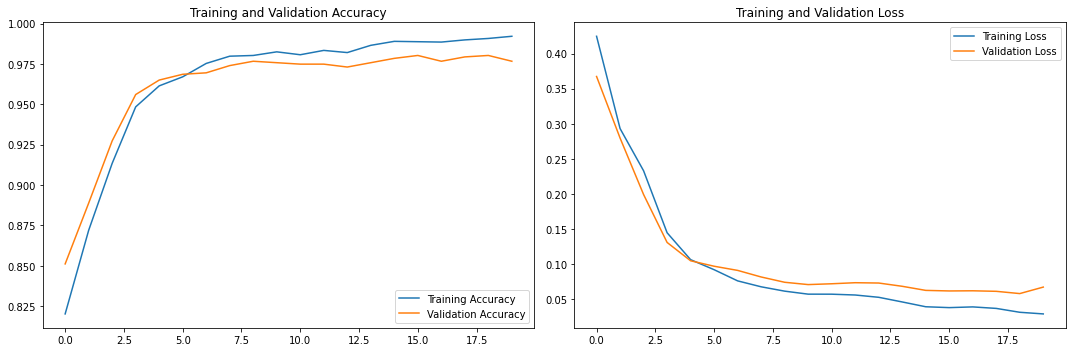

In [ ]:
import matplotlib.pyplot as plt
plot_history(history, 20)

**LSTM có Pooling**

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, GRU, GlobalAveragePooling1D
from tensorflow.keras.models import Model

inputs = Input(shape=(215,))                  

embed = Embedding(input_dim=embedding_matrix.shape[0],  
                 output_dim=embedding_matrix.shape[1],   
                  embeddings_initializer = tf.keras.initializers.Constant(value=embedding_matrix), 
                  trainable=False,                       
                 mask_zero=True)(inputs)                 

lstm = LSTM(units=100,                          
            return_sequences=True,
           return_state=True)(embed)      
print(lstm)
global_maxpool = GlobalAveragePooling1D()(lstm[0])
dense = Dense(units=2, activation='softmax')(global_maxpool)
model = Model(inputs=inputs,
              outputs=dense)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

[<KerasTensor: shape=(None, 215, 100) dtype=float32 (created by layer 'lstm_2')>, <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'lstm_2')>, <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'lstm_2')>]
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 215)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 215, 100)          40000200  
                                                                 
 lstm_2 (LSTM)               [(None, 215, 100),        80400     
                              (None, 100),                       
                              (None, 100)]                       
                                                                 
 global_average_pooling1d_1   (None, 100)              0         
 (GlobalAveragePooling1

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint(filepath="/content/lstm2_epoch: {epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)

history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])  

Epoch 1/20
9/9 [==============================] - 33s 4s/step - loss: 0.4589 - accuracy: 0.8437 - val_loss: 0.4220 - val_accuracy: 0.8520
Epoch 2/20
9/9 [==============================] - 28s 3s/step - loss: 0.3555 - accuracy: 0.8688 - val_loss: 0.3412 - val_accuracy: 0.8520
Epoch 3/20
9/9 [==============================] - 29s 4s/step - loss: 0.3035 - accuracy: 0.8690 - val_loss: 0.2849 - val_accuracy: 0.8655
Epoch 4/20
9/9 [==============================] - 28s 4s/step - loss: 0.2295 - accuracy: 0.8991 - val_loss: 0.2057 - val_accuracy: 0.9390
Epoch 5/20
9/9 [==============================] - 27s 3s/step - loss: 0.1690 - accuracy: 0.9457 - val_loss: 0.1651 - val_accuracy: 0.9399
Epoch 6/20
9/9 [==============================] - 29s 4s/step - loss: 0.1288 - accuracy: 0.9565 - val_loss: 0.1221 - val_accuracy: 0.9650
Epoch 7/20
9/9 [==============================] - 28s 3s/step - loss: 0.1046 - accuracy: 0.9637 - val_loss: 0.1042 - val_accuracy: 0.9650
Epoch 8/20
9/9 [==================

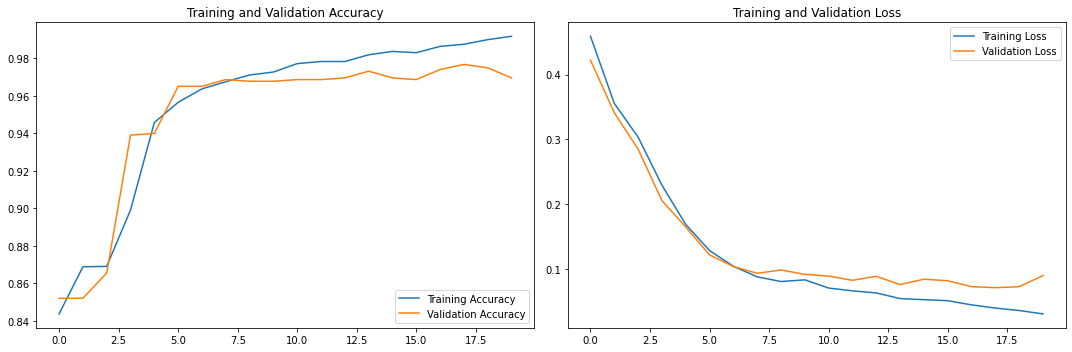

In [ ]:
plot_history(history, 20)

**GRU không có Pooling**

In [ ]:


from tensorflow.keras.layers import Input, Embedding,GRU, LSTM, Bidirectional, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(None,))                   

embed = Embedding(input_dim=embedding_matrix.shape[0],   
                 output_dim=embedding_matrix.shape[1],   
                  embeddings_initializer = tf.keras.initializers.Constant(value=embedding_matrix),  
                  trainable=False,                       
                 mask_zero=True)(inputs)                 
                                                         

gru = GRU(units=100,                         
            return_sequences=False)(embed)      

dense = Dense(units=2, activation='softmax')(gru)
model = Model(inputs=inputs,
              outputs=dense)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 100)         40000200  
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 40,061,002
Trainable params: 60,802
Non-trainable params: 40,000,200
_________________________________________________________________


In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint(filepath="/content/epoch: {epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)

history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])         

Epoch 1/20
9/9 [==============================] - 35s 4s/step - loss: 0.5186 - accuracy: 0.7080 - val_loss: 0.3759 - val_accuracy: 0.8511
Epoch 2/20
9/9 [==============================] - 30s 4s/step - loss: 0.3365 - accuracy: 0.8699 - val_loss: 0.3484 - val_accuracy: 0.8511
Epoch 3/20
9/9 [==============================] - 29s 4s/step - loss: 0.2927 - accuracy: 0.8726 - val_loss: 0.2983 - val_accuracy: 0.8655
Epoch 4/20
9/9 [==============================] - 30s 4s/step - loss: 0.2694 - accuracy: 0.8854 - val_loss: 0.2795 - val_accuracy: 0.8753
Epoch 5/20
9/9 [==============================] - 29s 4s/step - loss: 0.2515 - accuracy: 0.8953 - val_loss: 0.2523 - val_accuracy: 0.8915
Epoch 6/20
9/9 [==============================] - 29s 4s/step - loss: 0.2221 - accuracy: 0.9072 - val_loss: 0.2107 - val_accuracy: 0.9184
Epoch 7/20
9/9 [==============================] - 29s 4s/step - loss: 0.1730 - accuracy: 0.9388 - val_loss: 0.1456 - val_accuracy: 0.9605
Epoch 8/20
9/9 [==================

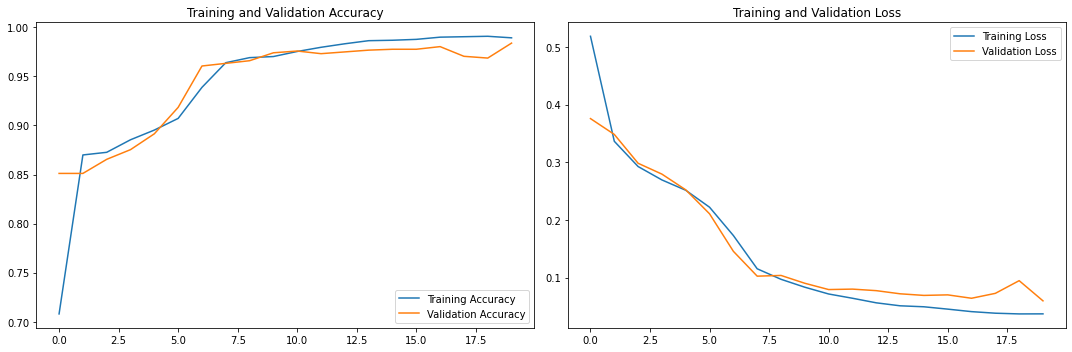

In [ ]:
import matplotlib.pyplot as plt
plot_history(history, 20)

**GRU có Pooling**

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, GRU, GlobalAveragePooling1D
from tensorflow.keras.models import Model

inputs = Input(shape=(215,))                   

embed = Embedding(input_dim=embedding_matrix.shape[0],   
                 output_dim=embedding_matrix.shape[1],   
                  embeddings_initializer = tf.keras.initializers.Constant(value=embedding_matrix), 
                  trainable=False,                   
                 mask_zero=True)(inputs)             
                                                     

gru2 = GRU(units=100,                       
            return_sequences=True,
           return_state=True)(embed)      
print(gru2)
global_maxpool = GlobalAveragePooling1D()(gru2[0])
dense = Dense(units=2, activation='softmax')(global_maxpool)
model = Model(inputs=inputs,
              outputs=dense)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

[<KerasTensor: shape=(None, 215, 100) dtype=float32 (created by layer 'gru_1')>, <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'gru_1')>]
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 215)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 215, 100)          40000200  
                                                                 
 gru_1 (GRU)                 [(None, 215, 100),        60600     
                              (None, 100)]                       
                                                                 
 global_average_pooling1d_2   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None,

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint(filepath="/content/2.epoch: {epoch:02d}.hdf5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0,
                                     save_best_only=False)


history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc]) 

Epoch 1/20
9/9 [==============================] - 36s 4s/step - loss: 0.4264 - accuracy: 0.8616 - val_loss: 0.4122 - val_accuracy: 0.8520
Epoch 2/20
9/9 [==============================] - 30s 4s/step - loss: 0.3432 - accuracy: 0.8688 - val_loss: 0.3289 - val_accuracy: 0.8520
Epoch 3/20
9/9 [==============================] - 30s 4s/step - loss: 0.2949 - accuracy: 0.8693 - val_loss: 0.2914 - val_accuracy: 0.8583
Epoch 4/20
9/9 [==============================] - 31s 4s/step - loss: 0.2525 - accuracy: 0.8778 - val_loss: 0.2419 - val_accuracy: 0.8906
Epoch 5/20
9/9 [==============================] - 30s 4s/step - loss: 0.1952 - accuracy: 0.9280 - val_loss: 0.1756 - val_accuracy: 0.9516
Epoch 6/20
9/9 [==============================] - 31s 4s/step - loss: 0.1389 - accuracy: 0.9556 - val_loss: 0.1309 - val_accuracy: 0.9596
Epoch 7/20
9/9 [==============================] - 30s 4s/step - loss: 0.1141 - accuracy: 0.9585 - val_loss: 0.1195 - val_accuracy: 0.9596
Epoch 8/20
9/9 [==================

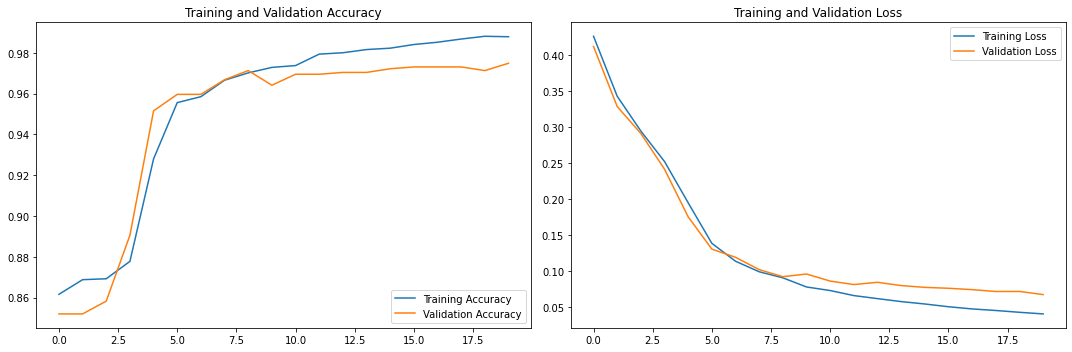

In [ ]:
plot_history(history, 20)

**GRU vs LSTM**

Đối với mạng LSTM, ta thấy rằng số lượng tensor input là 3. Bao gồm:
1. Memory: giúp lưu trữ thông tin được truyền đi trong mạng
2. Hidden state
3. Input

Kiến trúc cell của LSTM sử dụng 5 activation function. Điều này cũng làm cho mạng LSTM trở nên khá phức tạp.

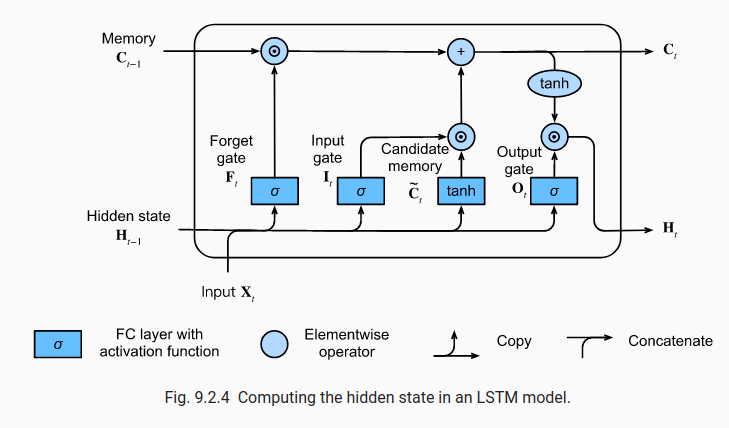

Mạng GRU bên dưới đây có số lượng đầu vào là 2, gồm: 
1. Hidden state
2. Input

Từ đây ta thấy rằng số lượng đầu vào của GRU ít hơn LSTM, do vậy số lượng tính toán trên ma trận (tensor) là ít hơn. Ngoài ra, GRU cell sử dụng 3 activation functions, điều này làm cho kiến trúc của GRU bớt phức tạp hơn LSTM. Dẫn đến việc thời gian huấn luyện sẽ nhanh hơn so với LSTM.

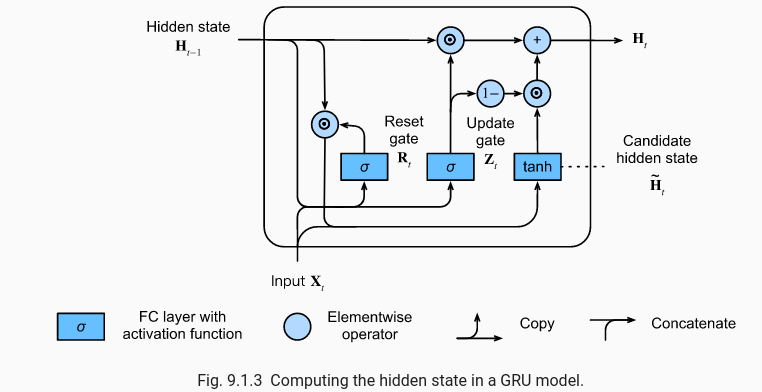

Tuy nhiên, về độ hiệu quả của hai mô hình rất khó để nói chính xác bên nào tốt hơn. Việc này phụ thuộc nhiều vào thực nghiệm.

Đối với bài tập này, cả hai mô hình đều cho kết quả khá xấp xỉ nhau.